1. Understand the Problem

* Goal: Predict whether a person has kidney disease or not.
* Type of problem: Binary Classification.

In [2]:
# importation les bibliotheque nécessaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn import svm
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler,normalize,MinMaxScaler
import zipfile
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import joblib


2. Gather and Explore the Data
* from kaggle website "https://www.kaggle.com/datasets/amanik000/kidney-disease-dataset"
* unzip data file.zip

In [3]:
#!kaggle datasets download -d amanik000/kidney-disease-dataset

#with zipfile.ZipFile('../kidney-disease-dataset.zip', 'r') as zip_ref:
#    zip_ref.extractall('data')

3. Data understanding and analysing 
* Step 1: Let's start by loading the dataset and taking a first look.
* step 2: data understanding 
* step 3: Check for missing values 

In [3]:
df = pd.read_csv("../data/kidney_disease_dataset.csv")
print(df.head())

   Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  54                     167                      1.023   
1                  42                     127                      1.023   
2                  38                     148                      1.016   
3                   7                      98                      1.017   
4                  67                     174                      1.015   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0                 1               4                   normal   
1                 3               2                   normal   
2                 0               0                 abnormal   
3                 4               0                 abnormal   
4                 1               1                   normal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  \
0           abnormal              not present       not present   
1             normal    

In [63]:
one_example = df[df['Target'] == 'No_Disease'].iloc[0]
print(one_example)


Age of the patient                                      54
Blood pressure (mm/Hg)                                 167
Specific gravity of urine                            1.023
Albumin in urine                                         1
Sugar in urine                                           4
Red blood cells in urine                            normal
Pus cells in urine                                abnormal
Pus cell clumps in urine                       not present
Bacteria in urine                              not present
Random blood glucose level (mg/dl)                      96
Blood urea (mg/dl)                              169.101369
Serum creatinine (mg/dl)                              7.55
Sodium level (mEq/L)                             146.06841
Potassium level (mEq/L)                           6.272576
Hemoglobin level (gms)                                11.8
Packed cell volume (%)                                  35
White blood cell count (cells/cumm)                   57

In [5]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [90]:
df.describe()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),...,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Body Mass Index (BMI),Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,...,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000
mean,47.477895,130.352079,1.015041,2.501266,2.494595,284.630295,104.094240,7.781865,135.076646,4.992314,...,200.236440,40.265400,9.001840,4.241157,27.544240,14.918152,14.946879,1.749459,5.061633,7.702504
std,24.941947,29.063838,0.005793,1.697084,1.701059,124.633265,55.726482,4.179925,8.651000,0.871026,...,57.863374,17.310488,0.867301,1.006735,7.221082,8.963722,8.945500,0.718980,2.853217,4.191765
min,5.000000,80.000000,1.005000,0.000000,0.000000,70.000000,7.002370,0.500000,120.000613,3.500005,...,100.000000,10.000045,7.500000,2.500000,15.000000,0.000000,0.000000,0.500000,0.100000,0.500000
25%,26.000000,105.000000,1.010000,1.000000,1.000000,176.000000,55.864665,4.200000,127.563468,4.229885,...,150.000000,25.396841,8.250000,3.380000,21.300000,7.000000,7.000000,1.130000,2.600000,4.050000
50%,47.000000,131.000000,1.015000,3.000000,2.000000,284.500000,104.401355,7.780000,135.044974,4.990991,...,200.000000,40.423386,8.990000,4.230000,27.600000,15.000000,15.000000,1.750000,5.070000,7.710000
75%,69.000000,156.000000,1.020000,4.000000,4.000000,393.000000,152.480048,11.430000,142.607311,5.749899,...,250.000000,55.272665,9.750000,5.110000,33.800000,23.000000,23.000000,2.370000,7.537500,11.297500
max,90.000000,180.000000,1.025000,5.000000,5.000000,500.000000,199.994361,15.000000,149.999914,6.499827,...,300.000000,69.999871,10.500000,6.000000,40.000000,30.000000,30.000000,3.000000,10.000000,15.000000


In [7]:
#step3
# Check total number of missing values
print("\nTotal missing values in dataset:", df.isnull().sum().sum())


Total missing values in dataset: 0


In [92]:
# Optionally, show rows with any missing values
print("\nRows with missing values:")
print(len(df[df.isnull().any(axis=1)]))


Rows with missing values:
0


4. Data visualisation
* Step 1: Splitting Quantitative and Qualitative Columns
* step 2: Visualise data 


In [37]:
# splitting data into features and target 
X = df.drop('Target', axis=1)
Y = df['Target']

In [45]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
print("Quantitative columns:", len(num_cols), list(num_cols))
print("Qualitative columns:", len(cat_cols), list(cat_cols))


Quantitative columns: 28 ['Age of the patient', 'Blood pressure (mm/Hg)', 'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine', 'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)', 'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)', 'Potassium level (mEq/L)', 'Hemoglobin level (gms)', 'Packed cell volume (%)', 'White blood cell count (cells/cumm)', 'Red blood cell count (millions/cumm)', 'Estimated Glomerular Filtration Rate (eGFR)', 'Urine protein-to-creatinine ratio', 'Urine output (ml/day)', 'Serum albumin level', 'Cholesterol level', 'Parathyroid hormone (PTH) level', 'Serum calcium level', 'Serum phosphate level', 'Body Mass Index (BMI)', 'Duration of diabetes mellitus (years)', 'Duration of hypertension (years)', 'Cystatin C level', 'C-reactive protein (CRP) level', 'Interleukin-6 (IL-6) level']
Qualitative columns: 14 ['Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine', 'Hypertension (yes/no)', 'Diabetes mellitus

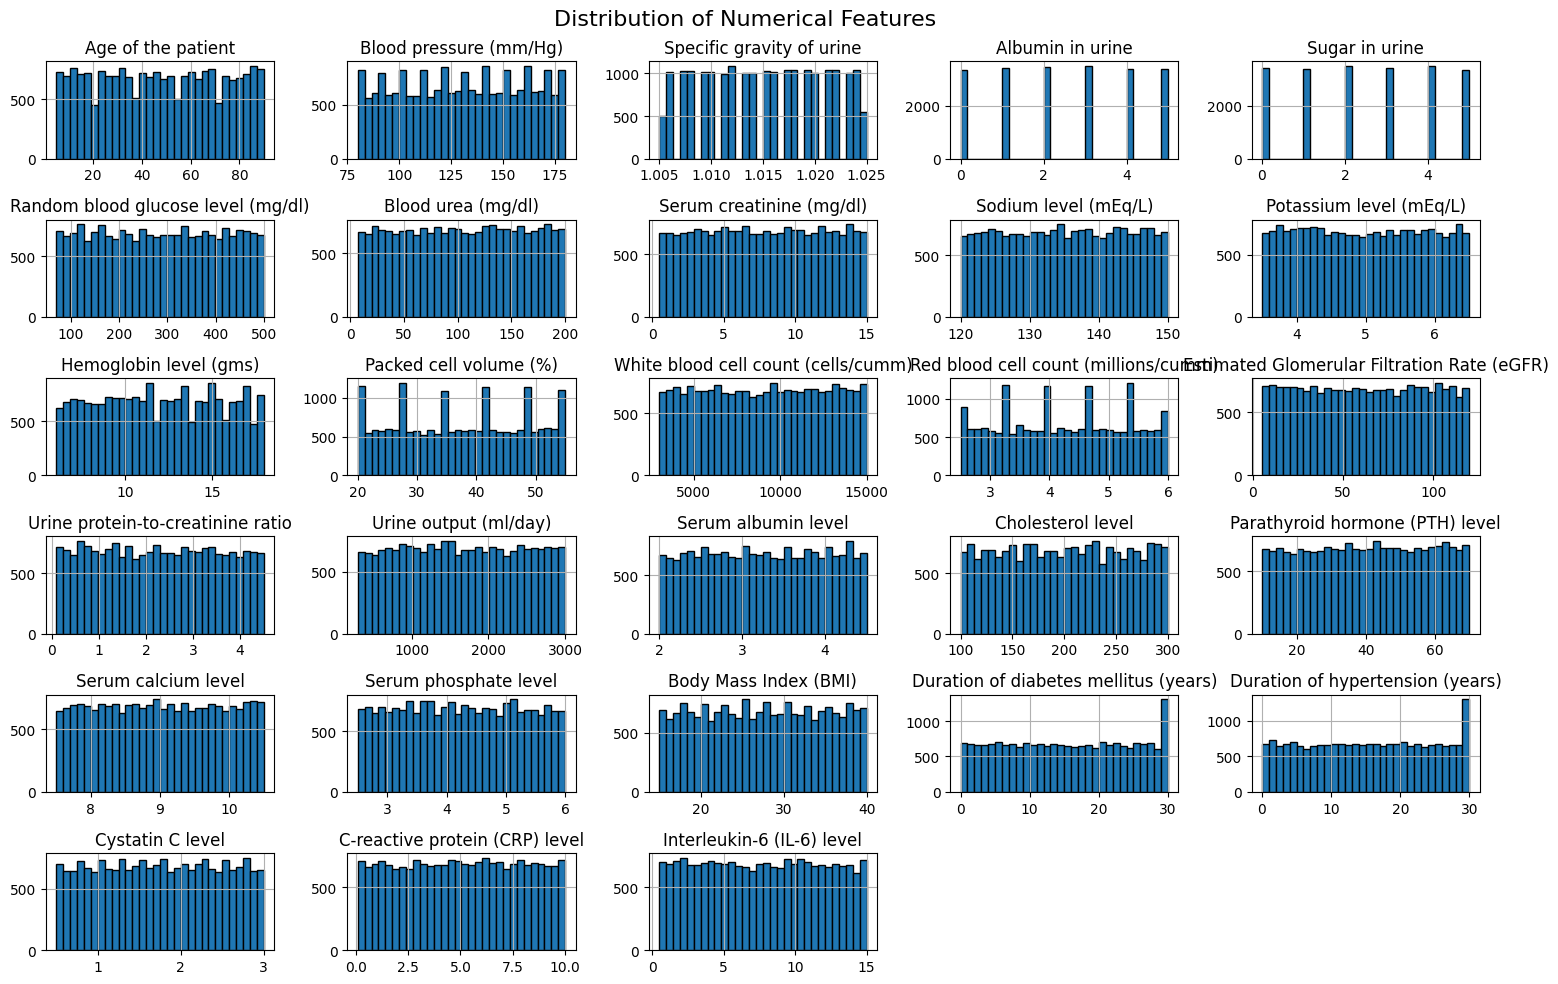

In [39]:
# Plot histograms for all numerical features
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

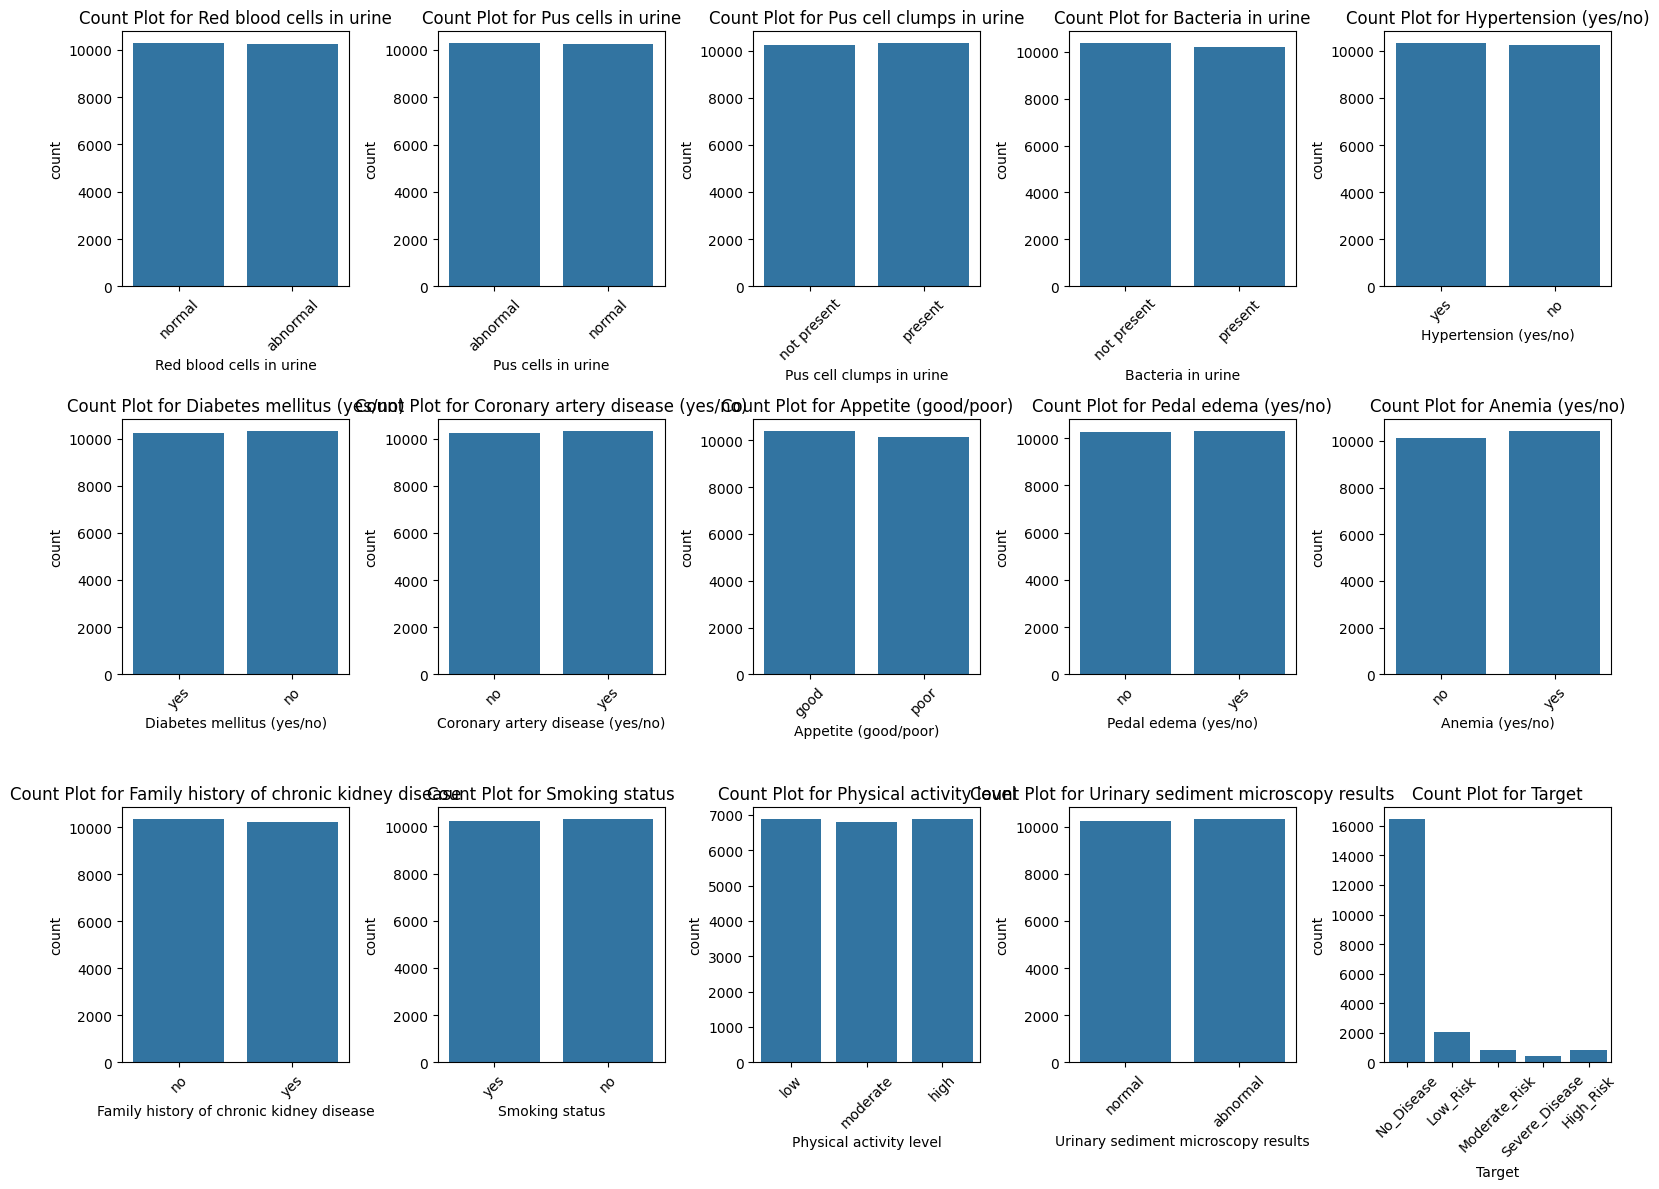

In [39]:
plt.figure(figsize=(16, 4 * ((len(cat_cols) + 3) // 5)))  # Adjust height based on number of rows

for i, col in enumerate(cat_cols):
    plt.subplot((len(cat_cols) + 3) // 5, 5, i + 1)  # rows, cols, plot index
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


5. data cleaning
* step0: split data into x and y 
* step1: Encodage LabelEncoder for target
* step2: Encodage des Features avec labelEncoder 

In [40]:
df['Target'].unique()

array(['No_Disease', 'Low_Risk', 'Moderate_Risk', 'Severe_Disease',
       'High_Risk'], dtype=object)

In [64]:
# Assume y contains string labels
le_target = LabelEncoder()
y = le_target.fit_transform(Y)

In [41]:
df['Sugar in urine'].unique()

array([4, 2, 0, 1, 3, 5])

In [40]:
df['Physical activity level'].unique()

array(['low', 'moderate', 'high'], dtype=object)

In [67]:
df_cat = df[cat_cols]

label_encoders = {}
for col in df_cat.columns:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
    label_encoders[col] = le


print(len(df_cat.columns))

14


C:\Users\hadhr\AppData\Local\Temp\ipykernel_120360\928693957.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = le.fit_transform(df_cat[col])
C:\Users\hadhr\AppData\Local\Temp\ipykernel_120360\928693957.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = le.fit_transform(df_cat[col])
C:\Users\hadhr\AppData\Local\Temp\ipykernel_120360\928693957.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [68]:
joblib.dump(label_encoders, '../model/label_encoders.pkl')

['../model/label_encoders.pkl']

In [48]:
df_cat.describe()

,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Family history of chronic kidney disease,Smoking status,Physical activity level,Urinary sediment microscopy results
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000
mean,0.500146,0.499757,0.501412,0.495910,0.502045,0.498491,0.501655,0.494401,0.500876,0.506476,0.497371,0.498831,0.996640,0.498393
std,0.500012,0.500012,0.500010,0.499995,0.500008,0.500010,0.500009,0.499981,0.500011,0.499970,0.500005,0.500011,0.815823,0.500010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [69]:

df_num = df[num_cols]
df_encoded = pd.concat([df_cat, df_num], axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

In [70]:
df_encoded.columns

Index(['Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)',
       'Coronary artery disease (yes/no)', 'Appetite (good/poor)',
       'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Family history of chronic kidney disease', 'Smoking status',
       'Physical activity level', 'Urinary sediment microscopy results',
       'Age of the patient', 'Blood pressure (mm/Hg)',
       'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine',
       'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)',
       'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)',
       'Potassium level (mEq/L)', 'Hemoglobin level (gms)',
       'Packed cell volume (%)', 'White blood cell count (cells/cumm)',
       'Red blood cell count (millions/cumm)',
       'Estimated Glomerular Filtration Rate (eGFR)',
       'Urine protein-to-creatinine ratio', 'Urine output (ml/day)',
       'S

In [52]:
df_scaled.describe()

,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),...,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Body Mass Index (BMI),Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level
count,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,...,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04,2.053800e+04
mean,6.711719e-17,5.466246e-17,5.976544e-17,2.456351e-17,8.787509e-17,-2.906105e-17,-5.604632e-17,-8.718316e-17,-1.946053e-16,4.514842e-17,...,-7.611228e-18,8.173421e-17,-1.322970e-15,-3.220933e-16,2.176119e-16,-4.739719e-17,6.495491e-17,-6.365754e-17,-1.667551e-16,6.573333e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.000292e+00,-9.995132e-01,-1.002828e+00,-9.918532e-01,-1.004098e+00,-9.969857e-01,-1.003316e+00,-9.888633e-01,-1.001754e+00,-1.013037e+00,...,-1.732337e+00,-1.748425e+00,-1.731666e+00,-1.729552e+00,-1.737211e+00,-1.664321e+00,-1.670923e+00,-1.737864e+00,-1.739004e+00,-1.718293e+00
25%,-1.000292e+00,-9.995132e-01,-1.002828e+00,-9.918532e-01,-1.004098e+00,-9.969857e-01,-1.003316e+00,-9.888633e-01,-1.001754e+00,-1.013037e+00,...,-8.682118e-01,-8.589545e-01,-8.668940e-01,-8.554175e-01,-8.647446e-01,-8.833768e-01,-8.883878e-01,-8.616011e-01,-8.627782e-01,-8.713735e-01
50%,9.997079e-01,-9.995132e-01,9.971799e-01,-9.918532e-01,9.959184e-01,-9.969857e-01,9.966945e-01,-9.888633e-01,9.982487e-01,9.871312e-01,...,-4.086273e-03,9.126784e-03,-1.365188e-02,-1.108300e-02,7.722030e-03,9.131282e-03,5.938443e-03,7.524013e-04,2.932527e-03,1.788279e-03
75%,9.997079e-01,1.000487e+00,9.971799e-01,1.008214e+00,9.959184e-01,1.003023e+00,9.966945e-01,1.011262e+00,9.982487e-01,9.871312e-01,...,8.600392e-01,8.669675e-01,8.626508e-01,8.630515e-01,8.663400e-01,9.016394e-01,9.002647e-01,8.631059e-01,8.677670e-01,8.576538e-01
max,9.997079e-01,1.000487e+00,9.971799e-01,1.008214e+00,9.959184e-01,1.003023e+00,9.966945e-01,1.011262e+00,9.982487e-01,9.871312e-01,...,1.724165e+00,1.717756e+00,1.727423e+00,1.747119e+00,1.724958e+00,1.682584e+00,1.682800e+00,1.739368e+00,1.730849e+00,1.740955e+00


6. Training the model
* step1 : split the data into train and test 
* step2 : train

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15403, 42) (15403,) (5135, 42) (5135,)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=537, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=537),
    'Random Forest': RandomForestClassifier(random_state=537),
    'Gradient Boosting': GradientBoostingClassifier(random_state=537),
    'SVM': SVC(random_state=537, kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),   
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name}: Accuracy = {accuracy:.4f}')

Logistic Regression: Accuracy = 0.8023
Decision Tree: Accuracy = 0.6280
Random Forest: Accuracy = 0.8023
Gradient Boosting: Accuracy = 0.7984
SVM: Accuracy = 0.8023
K-Nearest Neighbors: Accuracy = 0.7718
Naive Bayes: Accuracy = 0.8023
Neural Network: Accuracy = 0.7686


7.Model Tuning with random_search

In [26]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 11],
        'weights': ['uniform', 'distance']
    },
    'Naive Bayes': {}  # no tuning for basic GaussianNB
}

In [ ]:

#results = {}

#for name, model in models.items():
#    print(f"Tuning {name}...")

#    if name in param_grids and param_grids[name]:
        # Use RandomizedSearchCV instead of GridSearchCV
#        random_search = RandomizedSearchCV(
#            estimator=model,
#            param_distributions=param_grids[name],
#            n_iter=10,  # Try 10 random combinations
#            scoring='accuracy',
#            cv=5,
#            n_jobs=-1,
#            random_state=42
#        )
#        random_search.fit(X_train, y_train)
#        best_model = random_search.best_estimator_
#        print(f"Best Params for {name}: {random_search.best_params_}")
#    else:
        # For models with no hyperparameters (e.g., Naive Bayes)
#        model.fit(X_train, y_train)
#        best_model = model

#    y_pred = best_model.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
#    results[name] = accuracy
#    print(f"{name} Accuracy: {accuracy:.4f}\n")


Tuning Logistic Regression...


c:\Users\hadhr\Documents\chronic-kidney-disease\Chronic-Kidney-Disease\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params for Logistic Regression: {'penalty': 'l1', 'C': 0.01}
Logistic Regression Accuracy: 0.8023

Tuning Decision Tree...
Best Params for Decision Tree: {'min_samples_split': 2, 'max_depth': 3}
Decision Tree Accuracy: 0.8021

Tuning Random Forest...


c:\Users\hadhr\Documents\chronic-kidney-disease\Chronic-Kidney-Disease\.venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hadhr\Documents\chronic-kidney-disease\Chronic-Kidney-Disease\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hadhr\Documents\chronic-kidney-disease\Chronic-Kidney-Disease\.venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\User

Best Params for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 20}
Random Forest Accuracy: 0.8023

Tuning Gradient Boosting...
Best Params for Gradient Boosting: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}
Gradient Boosting Accuracy: 0.8023

Tuning SVM...


c:\Users\hadhr\Documents\chronic-kidney-disease\Chronic-Kidney-Disease\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [54]:
print(X_train.columns)

Index(['Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)',
       'Coronary artery disease (yes/no)', 'Appetite (good/poor)',
       'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Family history of chronic kidney disease', 'Smoking status',
       'Physical activity level', 'Urinary sediment microscopy results',
       'Age of the patient', 'Blood pressure (mm/Hg)',
       'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine',
       'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)',
       'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)',
       'Potassium level (mEq/L)', 'Hemoglobin level (gms)',
       'Packed cell volume (%)', 'White blood cell count (cells/cumm)',
       'Red blood cell count (millions/cumm)',
       'Estimated Glomerular Filtration Rate (eGFR)',
       'Urine protein-to-creatinine ratio', 'Urine output (ml/day)',
       'S

Model Saving

In [59]:
import joblib

# 1. Define and train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 2. Evaluate
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy:.4f}')

# 3. Save the trained model
joblib.dump(nb_model, '../model/naive_bayes_model.pkl')
print("Naive Bayes model saved to ")

Naive Bayes Accuracy: 0.8023
Naive Bayes model saved to 
